# Praktikum 12: partielle Differentialgleichungen


### Imports

In [473]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve,lu_factor,lu_solve

### Konstanten

In [474]:
Tl = 100 # °C
Tr = 0 # °C
L = 0.1 # m
a = 3.8 * 10**-6 # m^2/s

### Verständnisfragen

1. Was sind die Vor- und Nachteile von expliziten Zeitschrittverfahren gegenüber impliziten Zeitschrittverfahren? Für welche Fälle würden Sie implizite Verfahren vorziehen?

2. Erklären Sie die Unterschiede zwischen Dirichlet- und Neumann-Randbedingungen und deren Implementierung in einem zentrale Differenzen Schema für die DGL: $u''(x) = f(x)$.

1. Vorteilhaft ist, dass die expliziten Verfahren einfacher zu implementieren sind, da für diese im i-ten schritt nicht noch zusätzlich ein lineares Gleichungssystem glöst werden muss.  
Nachteilist, dass für explizite Verfahren ein Stabilitätskriterium erfüllt sein muss. Implizite Verfahren sind unbedingt stabil.

2. 

### Aufgabe 1: FTCS

Zwei grosse Platten der Dicke $L/2$ werden zum Zeitpunkt $t=0$ in Kontakt gebracht (optimaler Wärmekontakt), Skizze s. u. Die linke Platte hat die Temperatur $T_l = 100°C$ und die rechte Platte die Temperatur $T_r = 0°C$. Die Wärmeleitung wird durch die Wärmeleitungsgleichung beschrieben:

$\frac{\partial T}{\partial t} - \frac{\lambda}{\rho c}\cdot\frac{\partial^2T}{\partial x^2} = 0$,

wobei $\rho$ die Dichte, $c$ die spezifische Wärmekapazität und $\lambda$ die Wärmeleitfähigkeit bezeichnen.

Dieses Problem soll für zwei Stahlplatten der Dicke $L/2 = 5 cm$ mit Matlab numerisch gelöst werden. Wobei hier Cr-Ni-Stahl mit einer Temperaturleitfähigkeit von

$a = \frac{\lambda}{\rho c} = 3.8\cdot 10^{-6}m^2/s$

angenommen werden soll.


#### 1. Dirichlet - RB
Betrachten Sie den Fall isothermer Randbedingungen, d.h. die Temperaturen $T_l = 100°C$ und $T_r = 0°C$ werden konstant vorgegeben (der linke Rand der Platten wird geheizt und der rechte gekühlt). Diskretisieren Sie die Wärmeleitungsgleichung mit dem Forward Time Centred Space Schema (FTCS-Schema). Beachten Sie, dass für das FTCS-Schema die Zeitschritt-Restriktion  
$s = a\cdot\frac{\tau}{h^2}\leq\frac{1}{2}$  
gilt. Verwenden Sie in x-Richtung $J=30$ Stützstellen und wählen Sie $\tau$ gemäss der obigen Bedingung. Wie lange dauert es, bis sich die Temperatur zwischen zwei Zeitschritten $T_{n+1}$, $T_n$ punktweise weniger als $0.1°C$ ändert? $(\|T_{n+1}-T_n\|_\infty < 0.1)$  
Plotten Sie die erhaltenen Temperaturverläufe.

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.]


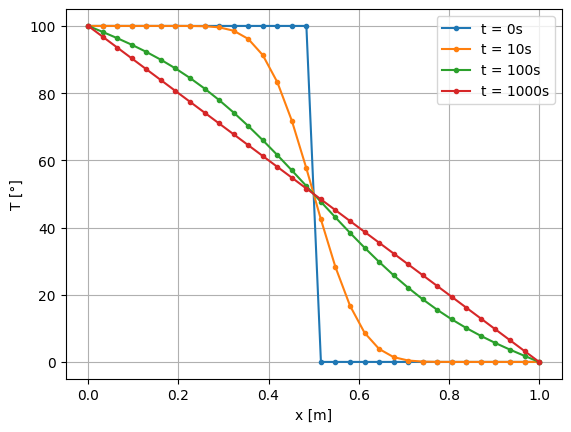

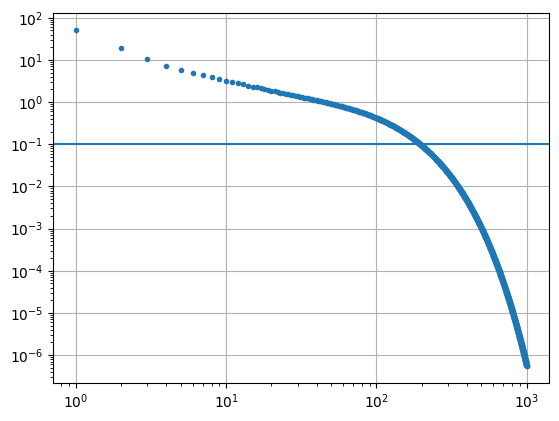

In [475]:
N = 30
Nmiddle = (int)(N/2+1)
h = L/(N+1)
dt = 1

A = np.zeros((N,N))
for i in range(0,N-1):
    A[i][i] = -2
    A[i+1][i] = 1
    A[i][i+1] =1
A[N-1][N-1] = -2
A = a/h**2 * A

v = np.zeros(N)
v[0] = a*Tl/h**2

K = 1000
t = np.zeros(K)
x = np.linspace(0, 1, N+2)
norm = np.zeros(K)

u = np.zeros((N+2,K))
u[:Nmiddle, 0] = Tl
u[(Nmiddle+1):, 0] = Tr
u[0,:] = 100
u[-1,:] = 0
print(u[:,0])

for k in range(1, K):
    u[1:N+1, k] = (np.identity(N)+dt*A)@u[1:N+1,k-1] + dt*v
    norm[k] = np.linalg.norm(u[:, k] - u[:, k-1])
    t[k] = k*dt

plt.figure()
plt.plot(x, u[:,0], '.-', label='t = 0s')
plt.plot(x, u[:,10-1], '.-', label='t = 10s')
plt.plot(x, u[:,100-1], '.-', label='t = 100s')
plt.plot(x, u[:,K-1], '.-', label='t = 1000s')
plt.xlabel("x [m]")
plt.ylabel("T [°]")
plt.legend()
plt.grid()

plt.figure()
plt.loglog(t[1:], norm[1:], '.')
plt.axhline(0.1)
plt.grid()

#### 2. Neumann - RB 
Betrachten Sie nun den adiabatischen Fall, d.h. für die Ränder gilt:  
$$0=\frac{\partial T}{\partial x}|_{x=0m}$$   
$$0=\frac{\partial T}{\partial x}|_{x=0.1m}$$  
Verwenden Sie wiederum das FTCS-Schema und zeigen Sie, dass für die Implementierung der Neumann-Randbedingungen mit zentralen Differenzen an den Randpunkten $x_1$ und $x_J$ gilt:  
$$T_{n+1,0}=2a\frac{\tau}{h^2}(T_{n,1}-T_{n,0})+T_{n,0}$$  
$$T_{n+1,J}=2a\frac{\tau}{h^2}(T_{n,J-1}-T_{n,J})+T_{n,J}$$   
Verwenden Sie in x-Richtung $J=10$ Stützstellen und wählen Sie $\tau$ gemäss der obigen Zeitschritt-Restriktion. Nach welcher Zeit ändert sich das Temperaturfeld für diesen Fall punktweise um weniger als $0.1°C$? Plotten Sie die erhaltenen Temperaturverläufe.

[100. 100. 100. 100. 100.   0.   0.   0.   0.   0.]


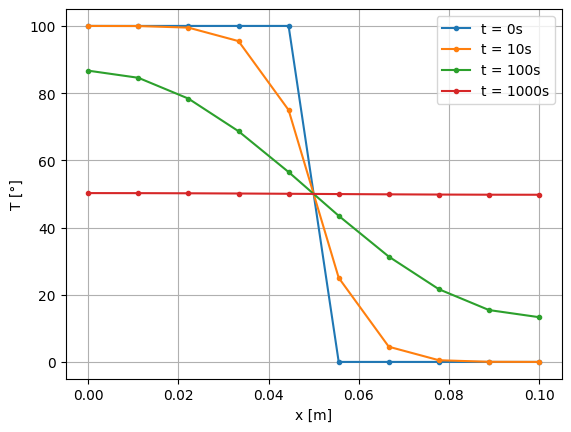

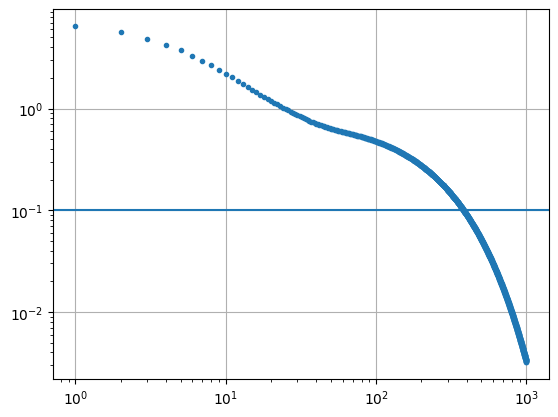

In [476]:
N = 10
Nmiddle = (int)(N/2+1)
h = L/(N+1)
dt = 1

A = np.zeros((N,N))
for i in range(0,N-1):
    A[i, i] = -2
    A[i+1, i] = 1
    A[i, i+1] =1
A[N-1, N-1] = -2
A[0, 1] = 2
A[N-1, N-2] = 2
A = a/h**2 * A

K = 1000
t = np.zeros(K)
x = np.linspace(0, 0.1, N)
norm = np.zeros(K)

u = np.zeros((N,K))
u[:Nmiddle, 0] = Tl
u[(Nmiddle-1):, 0] = Tr
print(u[:,0])

for k in range(1, K):
    u[:, k] = (np.identity(N)+dt*A)@u[:,k-1]
    norm[k] = np.linalg.norm(u[:, k] - u[:, k-1])
    t[k] = k*dt

plt.figure()
plt.plot(x, u[:,0], '.-', label='t = 0s')
plt.plot(x, u[:,10-1], '.-', label='t = 10s')
plt.plot(x, u[:,100-1], '.-', label='t = 100s')
plt.plot(x, u[:,K-1], '.-', label='t = 1000s')
plt.xlabel("x [m]")
plt.ylabel("T [°]")
plt.legend()
plt.grid()

plt.figure()
plt.loglog(t[1:], norm[1:], '.')
plt.axhline(0.1)
plt.grid()

### Aufgabe 2: Crank-Nicolson

Um die Zeitschritt-Restriktion zu umgehen, bietet sich die Verwendung eines impliziten Verfahrens an. Benutzen Sie das Crank-Nicolson-Verfahren für die Zeitintergration und das zentrale Differenzenverfahren für die räumliche Integration. Da das Crank-Nicolson-Verfahren implizit ist, muss in jedem Zeitschritt ein lineares Gleichungssystem gelöst werden. Die Diskretisierung führt auf ein System der Form 
$$A\cdot u_{n+1} = b_{n+1},$$

mit einer konstanten Tridiagonal-Matrix $A$ und dem zeitabhängigen Vektor $b_{n+1}$. Leiten Sie die Matrix und den Vektor her.

Wir betrachten nun den Fall aus 1.1 mit denselben Koeffzienten $a$ und Dirichlet-Randbedingungen $(T_l = 100°C,\quad T_r = 0°C)$. Berücksichtigen Sie die Dirichlet-Randbedingungen indem Sie die Matrix $A$ geeignet modifizieren. Die Matrix $A$ ist dann invertierbar. Berechnen Sie die LR-Zerlegung von $A$ und lösen Sie das System nur noch durch Vorwärts- und Rückwärtseinsetzen in jedem Zeitschritt oder verwenden Sie alternativ den Thomas-Algorithmus (Algorithmus 2.6 im Skript).

Bestimmen Sie den Zeitpunkt, ab dem sich die Lösung $T_{n+1}$ (punktweise) weniger als $10^{-5}°C$ ändert (also wir fordern hier ein deutlich höhere Genauigkeit als mit dem FTCS-Verfahren). Plotten Sie die erhaltenen Temperaturverläufe.

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.]


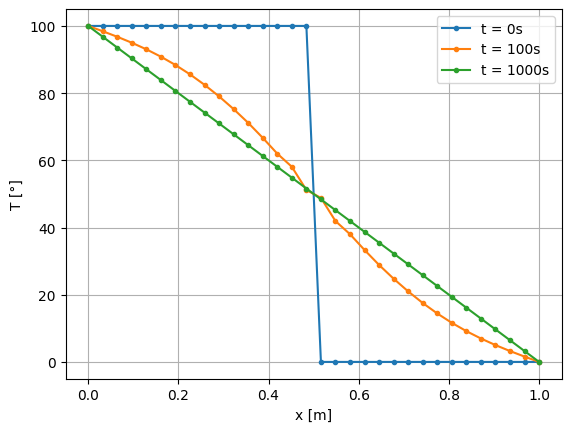

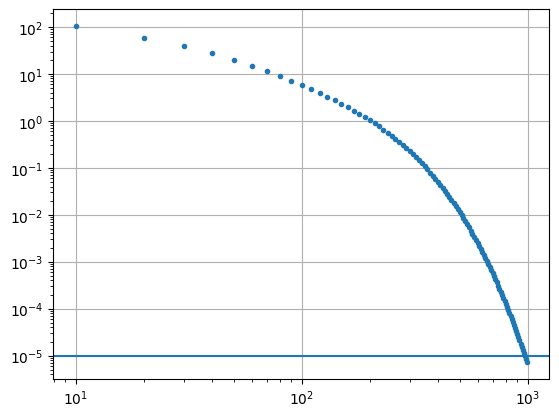

In [477]:
N = 30
Nmiddle = (int)(N/2+1)
h = L/(N+1)
dt = 10

A = np.zeros((N,N))
for i in range(0,N-1):
    A[i][i] = -2
    A[i+1][i] = 1
    A[i][i+1] =1
A[N-1][N-1] = -2
A = a/h**2 * A

v = np.zeros(N)
v[0] = a*Tl/h**2

K = 100
t = np.zeros(K)
x = np.linspace(0, 1, N+2)
norm = np.zeros(K)

u = np.zeros((N+2,K))
u[:Nmiddle, 0] = Tl
u[(Nmiddle+1):, 0] = Tr
u[0,:] = 100
u[-1,:] = 0
print(u[:,0])

LU,piv = lu_factor(np.identity(N)-dt/2*A)

for k in range(1, K):
    u[1:N+1, k] = lu_solve((LU,piv),(np.identity(N)+dt/2*A)@u[1:N+1,k-1] + dt*v)
    norm[k] = np.linalg.norm(u[:, k] - u[:, k-1])
    t[k] = k*dt

plt.figure()
plt.plot(x, u[:,0], '.-', label='t = 0s')
plt.plot(x, u[:,10-1], '.-', label='t = 100s')
plt.plot(x, u[:,K-1], '.-', label='t = 1000s')
plt.xlabel("x [m]")
plt.ylabel("T [°]")
plt.legend()
plt.grid()

plt.figure()
plt.loglog(t[1:], norm[1:], '.')
plt.axhline(10**-5)
plt.grid()